In [21]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib 

# load data

In [3]:
df = pd.read_csv('Iris.csv', index_col='Id')

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# rename column

In [5]:
def rename_columns(dataframe):
    old_names = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
    new_names = ['sepal_length', 'sepal_width', 'petal_length','petal_width','species']
    new_columns = dict(zip(old_names, new_names))
    return dataframe.rename(columns=new_columns)

In [6]:
df_new = rename_columns(df)

In [7]:
df_new.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# data info

## data shape

In [8]:
df_new.shape

(150, 5)

## data types

In [9]:
df_new.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# null detection

In [10]:
df_new.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# statistik

## describe

In [11]:
#Statistics of this dataset
stats = df_new.describe()
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## median

In [12]:
#calculate median of each species
x = df_new.groupby('species').median()
x

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


# matirx correlation

<AxesSubplot:>

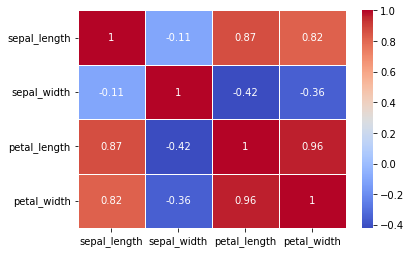

In [13]:
sns.heatmap(df_new.corr(),cmap="coolwarm", linecolor='white', linewidths=1,annot=True )

# pairplot

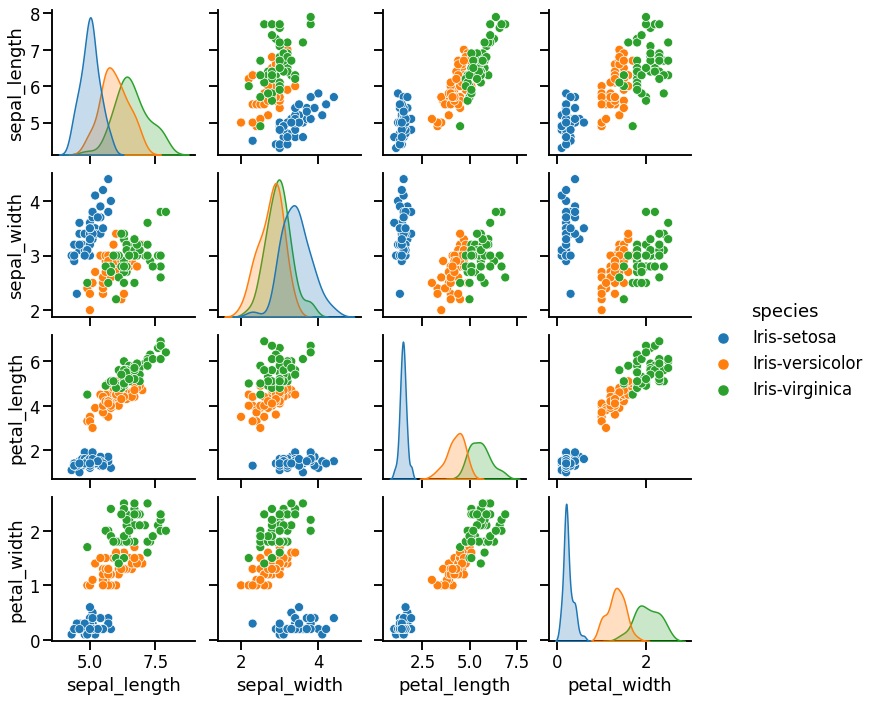

In [14]:
sns.set_context('talk')
sns.pairplot(df_new, hue='species');

# scatter plot

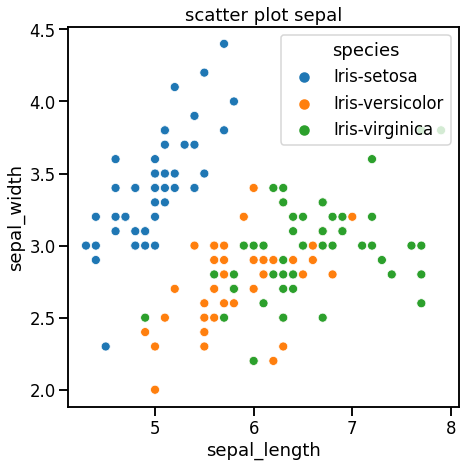

In [26]:
fig, ax= plt.subplots(figsize=(7,7))
plt.title('scatter plot sepal')
sns.scatterplot(data=df_new, x='sepal_length', y='sepal_width', hue='species')
plt.show()

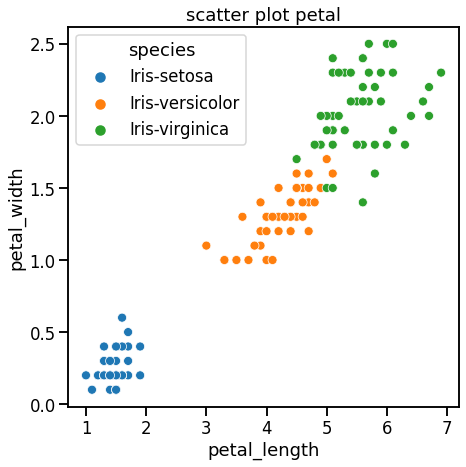

In [25]:
fig, ax= plt.subplots(figsize=(7,7))
plt.title('scatter plot petal')
sns.scatterplot(data=df_new, x='petal_length', y='petal_width', hue='species')
plt.show()

# boxplot

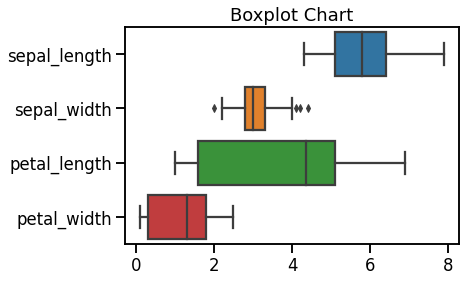

In [17]:
fig, ax= plt.subplots()
sns.boxplot(data=df_new, orient='h')
plt.title('Boxplot Chart')
plt.show()

# modelling

In [27]:
from sklearn.model_selection import train_test_split

target = 'species'
X = df_new[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 93.33333333333333 %


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [30]:
# export
joblib.dump(lr,'model.joblib')

['model.joblib']

In [31]:
model_loaded = joblib.load('model.joblib')

In [32]:
y_predict = model_loaded.predict(X[1:2])
y_predict

array(['Iris-setosa'], dtype=object)

In [33]:
pred_prob=model_loaded.predict_proba(X[1:2])

In [34]:
pred_prob

array([[9.64681815e-01, 3.53179283e-02, 2.57011617e-07]])